In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
df = pd.read_csv('NewMeander.csv')
df.sample(frac = 1).head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
96,H30,mea3-H30.jpg,15,1,M,L,22,3593.611894,7703.270196,41301.73519,0.000000,23.576204,168.758258,0.206102,944.475530,0.063444
226,P26,mea3-P26.jpg,31,2,F,L,59,6534.143743,8216.197515,62196.78628,0.000016,21.017350,210.416386,0.000000,774.260600,0.101124
15,H18,mea1-H18.jpg,3,1,F,R,50,2804.028645,5345.199852,49578.30733,0.006731,18.899909,205.796196,0.000000,608.423916,0.106897
41,H8,mea2-H8.jpg,127,1,F,R,44,7864.420109,9781.706649,36868.16702,0.000000,47.122967,178.911674,0.343541,3045.978340,0.186747
61,H30,mea2-H30.jpg,15,1,M,L,22,8349.979353,10074.810130,74070.42973,1.128256,24.545941,204.521890,0.181890,998.683197,0.152893


In [ ]:
df = df.drop(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT'], axis=1)
df.sample(frac = 1).head()

,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
258,2,M,R,49,3935.397504,7416.380420,32115.84792,0.002108,20.139321,179.390967,0.059351,611.508592,0.108696
141,2,F,R,59,3082.212227,6052.908773,42212.89881,0.000000,18.340748,212.149823,0.048088,520.026656,0.030303
123,1,M,R,34,3477.865667,6868.921812,46334.85858,0.003328,24.517041,212.471381,0.181866,1161.323382,0.097179
31,1,M,R,19,7811.099325,7718.316185,33936.51967,0.926472,72.539617,185.605154,2.159425,3319.866496,0.163462
150,2,M,R,57,3543.321462,6394.319547,31272.30633,0.002659,19.711538,206.242481,0.000000,612.618290,0.073248


In [ ]:
df = df.rename(columns={"CLASS_TYPE": "CLASS", "RIGH/LEFT-HANDED": "HAND", "CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT": "NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT"})
df.sample(frac = 1).head()

,CLASS,GENDER,HAND,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
87,1,M,L,42,4559.694255,6858.045150,40520.76416,0.000000,27.547221,210.704329,0.004435,1650.479035,0.078498
70,1,M,R,58,4585.432582,8601.194247,44401.27070,0.004588,22.704303,199.816849,0.000000,925.168813,0.131498
117,1,F,R,26,3685.807561,5714.961988,34057.59435,0.000000,18.478870,214.026004,0.173258,502.946510,0.119355
33,1,M,R,41,6087.080502,8058.080173,47874.63699,0.063567,43.378378,206.477350,0.000000,2721.674800,0.088235
238,2,M,R,65,4643.444224,6180.751459,29793.93755,0.010349,21.421304,199.943677,0.090057,955.194150,0.124204


In [ ]:
print("no. of samples: " + str(len(df)))
print()
df.isna().sum()

no. of samples: 264



CLASS                                 0
GENDER                                0
HAND                                  0
AGE                                   0
RMS                                   0
MAX_BETWEEN_ET_HT                     0
MIN_BETWEEN_ET_HT                     0
STD_DEVIATION_ET_HT                   0
MRT                                   0
MAX_HT                                0
MIN_HT                                0
STD_HT                                0
NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT    0
dtype: int64

In [ ]:
cats=['GENDER', 'HAND']
cnts=['AGE', 'RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT', 'NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT']

dep='CLASS'

In [ ]:
df['GENDER'] = pd.Categorical(df.GENDER)
df['HAND'] = pd.Categorical(df.HAND)

trn_df,val_df = train_test_split(df, test_size=0.2)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

[Text(0.5, 1.0, 'Left/Right hand distribution')]

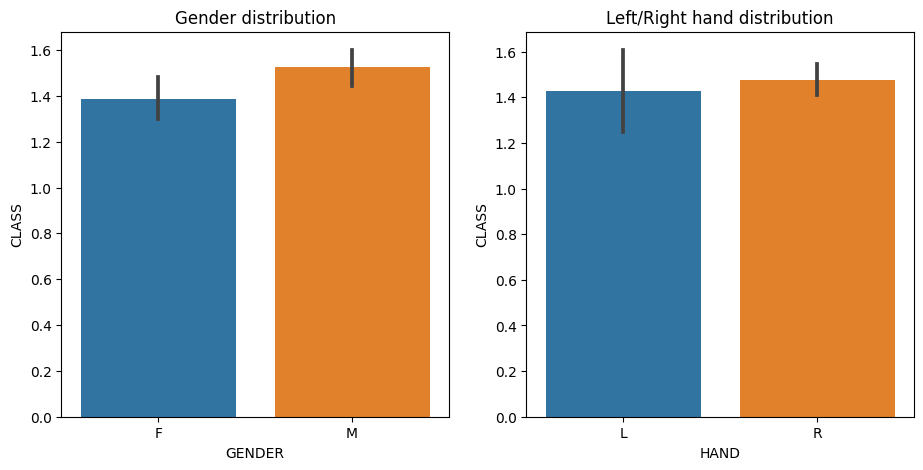

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(11,5))

sns.barplot(data=df, y=dep, x="GENDER", ax=axs[0]).set(title="Gender distribution")
sns.barplot(data=df, y=dep, x="HAND", ax=axs[1]).set(title="Left/Right hand distribution")

In [ ]:
df['GENDER'] = pd.Categorical(df.GENDER)
df['HAND'] = pd.Categorical(df.HAND)

trn_df,val_df = train_test_split(df, test_size=0.2)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [ ]:
def xs_y(df):
    xs = df[cats+cnts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [ ]:
m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y)

In [ ]:
import re
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

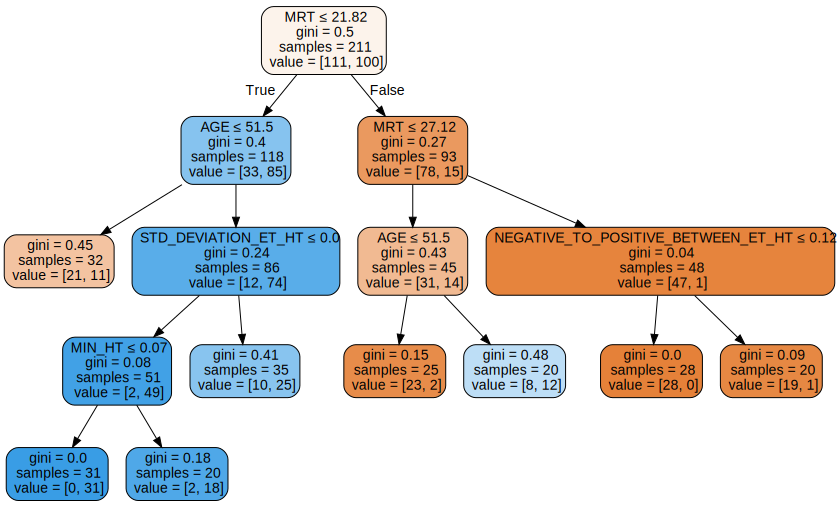

In [ ]:
m = DecisionTreeClassifier(min_samples_leaf=20)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

In [ ]:
mean_absolute_error(val_y, m.predict(val_xs))

0.18867924528301888

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
mean_absolute_error(val_y, rf.predict(val_xs))

0.1320754716981132

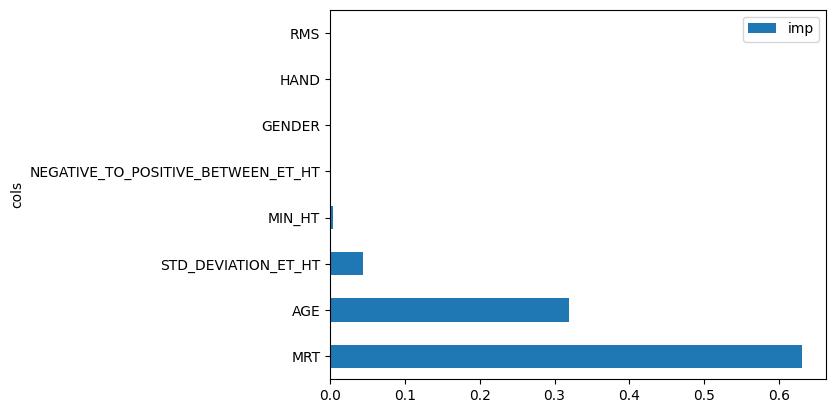

In [ ]:
datax = {'cols': trn_xs.columns, 'imp': m.feature_importances_}
dfx = pd.DataFrame(datax)

df_sorted = dfx.sort_values(by='imp', ascending=False)
df_top_n = df_sorted.head(8)

df_top_n.plot(x='cols', y='imp', kind='barh')

plt.show()